
## Simulation involving Discreet Random Variables

Data science has two basic interrelated tasks:

* uncovering things about the world by analyzing data
* predicting things about the future of the world given current data

Of course, ***data always come with uncertainty or "noise"***. If there was no uncertainty, the above tasks would be easy (but the world would be a very very boring place – think about it). But because there is always uncertainty, neither of the above tasks provide exact answers, but rather "best guesses" along with some ***probability distribution*** associated the the best guess. Before computers, this all had to be done with math and, when we do math, we often have to make assumptions (e.g. all noise is Gaussian) in order to make the math work. With computers, however, we can do ***simulations***.

Simulation is one of the most powerful tools in the data scientist's arsenal. It allows us to make assumptions about uncertainties that might not be mathematically tractable, or to analyze situations or events (e.g. a soccer game) for which no system of equations exist.

The simplist outcomes in life are *binary*, that is, there are only 2 *discrete* mutually exclusive possible outcomes. In the animal kingdome, there are often fights to establish position in a social hierarchy, such as a fight to determine the dominant male in a lion pride. At the end of the fight, there is a clear *winner* who maintains or assumes his position as the alpha male, and there is a clear *loser*, who then assumes a subordinate position or, often, if forced to leave the pride.

Local elections, like for a school board member, are another example. People vote, and the candidate that gets the most votes *wins* and the other candidate *loses* – a *binary* outcome. What's interesting about this situation is that each individual voter also produces a *disctete binary* outcome; they either vote for one candidate or the other. Thus, the final binary outcome is actually the result of summing up many individual binary outcomes.

We will begin learning about 
 discrete probability scenarios by simulating very simple situations and seeing what the probability distributions look like when played out over several repeats of simulated experiments. The point of the above examples is to illustrate that the simple situations we will start exploring are actually rather deep, and form the foundation of the techniques that data scientists use to predict things like presidential elections and sporting events – the latter now being a data-science-based [billion dollar industry](https://www.businessofapps.com/data/sports-betting-app-market/#:~:text=%C2%A32.2%20billion-,US%20Sports%20Betting%20App%20Revenue,approximately%2020%25%20of%20global%20revenues.). 


### Objectives:
The objectives of this excercise are three-fold. The first is to expand on our skills of simulating data corresponding to real-world experimental situations.
The second is to use simulations to help us understand the fundamentals of probability, the behavior of random variables, and the use of probability distribution to predict outcomes. Finally, we will see the emergence of the normal distribution from discrete random processes through the Central Limit Theorem.

### Learning Goals:

* Simulating discrete random processes
* Understanding discrete probability distributions
* Gaining a deeper appreciation of Central Limit Theorem 

### Preliminaries:
As always, we'll import our needed libraries.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

Because we're going to be generating a lot of random numbers, let's also import `numpy.random` with its own nickname to save ourselves some typing:

In [2]:
import numpy.random as rnd # random number generation – "rnd" is the conventional nickname

### Two discrete outcomes 

#### Coin Flipping
A very simple propablistic decision that results in a binary outcome is a simple coin flip. Each flip of a coin (or any other probabalitic event that results in one of two outcomes) is referred to as a "Bernoulli trial" (a "trial" being the conventional term in science for procedure that results in a single observation). A series of trials is referred to as an "experiment".

Let's do a single experiment consisting of 100 coin flips (i.e. 100 trials). To do this, were going to use `numpy.random`'s `choice()` function, which chooses items from a list we provide for a specified number of trials. Before you run the code, think about the expected number of heads and tails would be, assuming the coin is fair.

Now pretend you made a little wager with a friend on whether there would be more tails or more heads at the end of the experiment. Go ahead: make a bet, more heads or more tails?

##### A single coin flipping experiment

In [3]:
rnd.seed(42)     # Set the random seed for reproducibility
n_trials = 100  # Number of trials in our experiment

# Simulate flipping a fair coin 100 times
coin_flips = rnd.choice(['Heads', 'Tails'], size = n_trials) # randomly choose from list n_trials times
heads_count = np.sum(coin_flips == 'Heads')    # count the number of heads
tails_count = np.sum(coin_flips == 'Tails')    # count the number of tails – not really necessary...

print(f'Heads: {heads_count}, Tails: {tails_count}')

Heads: 44, Tails: 56


Just for grins, let's make a bar graph of the results. We'll also add a horizontal line to indicate the expected number of heads and tails (`plt` can do a lot for you, so remember to check its methods if you want to make your plots better!).

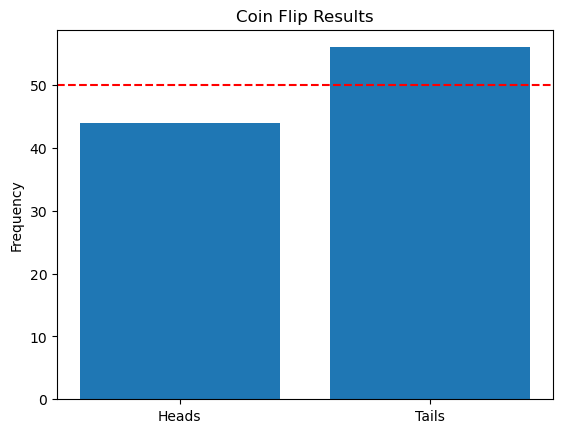

In [4]:
plt.bar(['Heads', 'Tails'], [heads_count, tails_count])
plt.axhline(y=50, color='r', linestyle='--')
plt.ylabel('Frequency')
plt.title('Coin Flip Results')
plt.show()

Okay, before we talk about this plot, let's admit to ourselves that it's, well, not exactly pleasing to the eye.

We can check for the available plot styles like this:

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In the code cell below, you can pick whatever style you wish. We've put `ggplot` as a placeholder, but feel free to change it.

In [6]:
plt.style.use('ggplot')

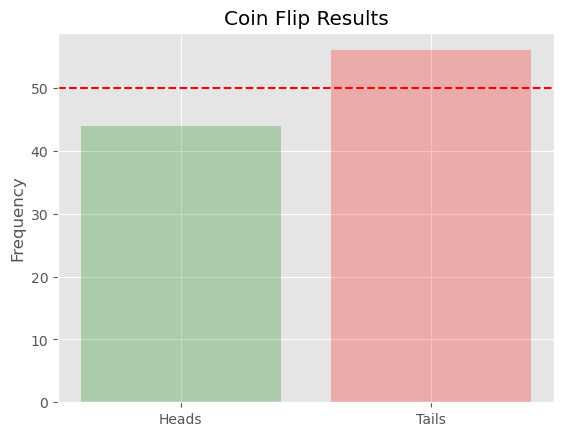

In [7]:
plt.bar(['Heads', 'Tails'], [heads_count, tails_count], alpha=0.25, color=['green', 'red'])
plt.axhline(y=50, color='r', linestyle='--')
plt.ylabel('Frequency')
plt.title('Coin Flip Results')
plt.show()

Okay, that's a little better...

Now, about the result. Most of us probably guessed "50" as the most probable number of heads, just based on intuition if nothing else (and that actually is the best guess in the sense that it is the guess most likely to be correct). 

But instead, we got 56 tails and 44 heads. Did that surprise you? If you lost the bet, did you immediately think something like "No way – there's no way that coin is fair" or "I just got swindled!"? Or was the result not that surprising to you?

Regardless of what your answer to that last question was, here the deeper question that's going to lead us to a key concept: 

***At what point would you suspect cheating? In other words, how much a departure from 50/50 would be so large that you would decide the coin wasn't fair***?

Let's put that question a little differently: At what point would a departure from 50/50 have such a low probability of occurring under the "fair coin assumption" that you would assert that the coin wasn't fair after all?

If this sounds familiar, it should (assuming you've had a statistics class). This question falls under the basic "hypothesis testing" framework in which 50/50 would be the "null hypothesis" and the probability mentioned would be called the "p-value".

So, next, let's see what the distribution of the number of heads looks if we do many experiments. In other words, let's see what the *sampling distribution* of a bunch of experiments consisting of Bernoulli trials looks like.

##### Many coin flipping experiments

Recall that a sampling distribution is the answer to the question "What would I get if I repeated an experiment a "**large**" (in the limit, an infinite) number of times. Once you have that, you have a *context* for your actual experimental value. If your value is a "typical" one relative the sampling distribution, then your value most likely came from a populations for which your assumptions were correct (e.g., a coin is fair). If, however, your experimental value was "rare" – way out on the tail of the sampling distribution – then you might decide the assumptions used to generate the sampling distribution were wrong (e.g. a coin is actually unfair). 

So, in this case, we'll generate the sampling distribution for the number of heads from experiments with 100 coin flips.

We'll initially do this "by hand" by recycling the above code and putting it in a `for()` loop. After that, we'll learn a more concise and efficient way to do the same thing.

First, here's the "by hand" version – we'll use 2000 as our "large" number of experiments, since that shouldn't take too long to run. Read through the code and make sure you understand it before you run it.

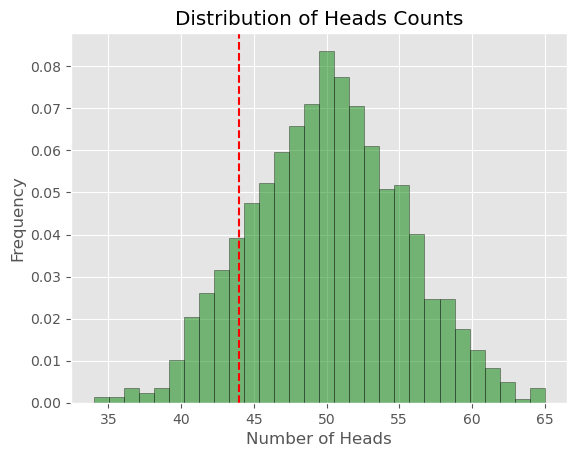

In [8]:
rnd.seed(42)     # Set the random seed for reproducibility
n_trials = 100  # Number of trials in our experiment
n_experiments = 2000 # Number of experiments to perform
n_heads = np.zeros(n_experiments) # Initialize array to store results
# Note that we don't need to store the tails count, 
# since it will always be 100 - n_heads

for i in range(n_experiments):
    # Simulate flipping a fair coin 100 times
    coin_flips = rnd.choice(['Heads', 'Tails'], size = n_trials) # randomly choose from list n_trials times
    heads_count = np.sum(coin_flips == 'Heads')    # number of heads
    n_heads[i] = heads_count    # store the number of heads

# Plot the distribution of heads counts
plt.hist(n_heads, bins = 30, 
         density = True, 
         color = 'green', 
         edgecolor = 'black',
         alpha = 0.5)
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.title('Distribution of Heads Counts')

# let's add a vertical line at our original result (44 heads)
plt.axvline(x=44, color='r', linestyle='--')

plt.show()

So what do you think? Should you accuse your friend of cheating? 

---

Before we go on, take the (rather long) code to plot our histogram above, and turn it into a function. The function should  take the vector containing the head counts as its input argument, and then it should do all the plotting! Once you have your function working, play around with bar colors, edge colors, etc. until your function makes histograms that are good looking to you.

In [9]:
def heads_vs_tails(heads_count):
    rnd.seed(42)     # Set the random seed for reproducibility
    n_trials = 100  # Number of trials in our experiment
    n_experiments = 2000 # Number of experiments to perform
    n_heads = np.zeros(n_experiments) # Initialize array to store results
    # Note that we don't need to store the tails count, 
    # since it will always be 100 - n_heads

    for i in range(n_experiments):
        # Simulate flipping a fair coin 100 times
        coin_flips = rnd.choice(['Heads', 'Tails'], size = n_trials) # randomly choose from list n_trials times
        heads_count = np.sum(coin_flips == 'Heads')    # number of heads
        n_heads[i] = heads_count    # store the number of heads

    # Plot the distribution of heads counts
    plt.hist(n_heads, bins = 30, 
             density = True, 
             color = 'green', 
             edgecolor = 'black',
             alpha = 0.5)
    plt.xlabel('Number of Heads')
    plt.ylabel('Frequency')
    plt.title('Distribution of Heads Counts')

    # let's add a vertical line at our original result (44 heads)
    plt.axvline(x=heads_count, color='r', linestyle='--')

    plt.show()

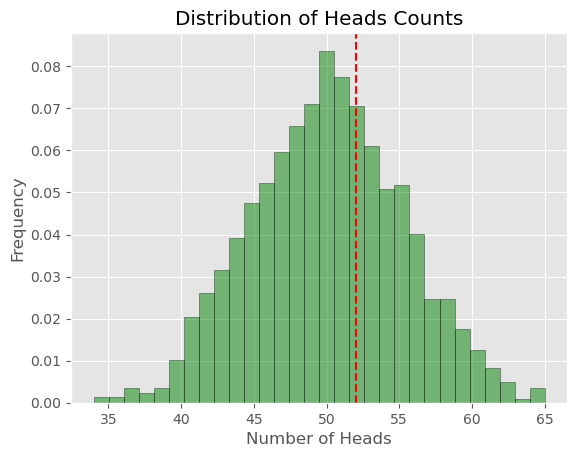

In [10]:
heads_vs_tails(100)

---

#### The Binomial Distribution

The distribution of the outcomes of experiments consisting of Bernoulli trials is actually one of the foundational distributions in statistics and data science. It is called the ***binomial*** distribution. As such, any computing environment for data science is going to provide a way so sample from the binomial distribution without having to write a `for()` loop to simulate each experiment. 

Below is code that does the same thing as the above, but it eliminates the `for()` loop and instead calls `rnd.binomial()`. We pass it 3 arguments: 

* the number of trials in each experiment
* the probability of a "head" for each Bernoulli trial (i.e. each coin flip)
* the number of experiments we wish to run. 

It will return a vector whose length is the number of experiments you requested, and each element will contain the number of heads obtained in that experiment.  

In [11]:
n_trials = 100             # Number of trials in each experiment
n_experiments = 2000       # Number of experiments to perform
p_head = 0.05               # Assuming a fair coin
# now get the results of all experiments in one function call!
results = rnd.binomial(n=n_trials, p=p_head, size=n_experiments) 

---

In the cell below, use your plotting function to plot a histogram of the `results` from above. Play around with different values of `p_head` and see what it does to the distribution. Make sure and try some extreme values like 0.9 or 0.05.

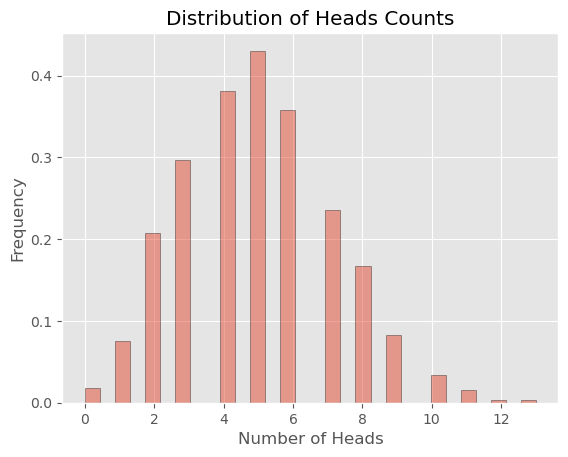

In [12]:
plt.hist(results, bins = 30, 
        density = True,
        edgecolor = 'black',
        alpha = 0.5)
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.title('Distribution of Heads Counts')

plt.show()

---

#### The binomial distribution at large sample sizes – Central Limit Theorem

How do you think the binomial distribution changes as we flip more coins? Let's do several simulations of a bunch of experiments, with each simulation using a different number of coin flips.

In order to make easy & pretty plots of the distributions, let's import the `seaborn` plotting package.

In [13]:
import seaborn as sns

In the code below, we'll use a `for()` loop to do our simulations using various sample sizes (number of coin flips per experiment), then we'll plot each sampling distribution as a KDE (kernel density estimate) which, for now, we can think of as just a smoothed histogram. Plots using overlapping KDEs are just much more visually appealing than plots of overlapping histograms.

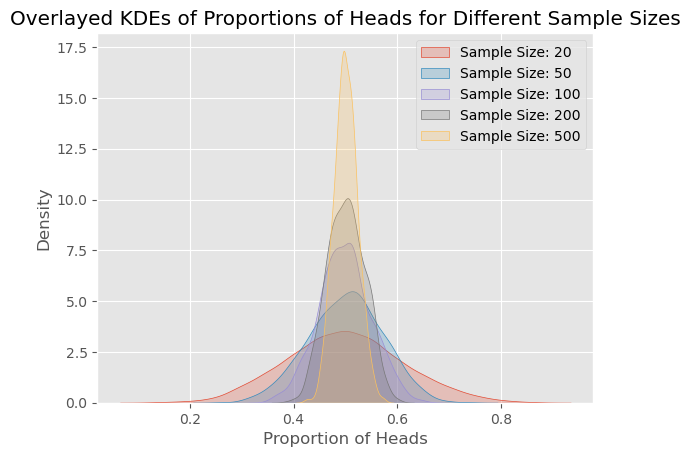

In [14]:
sample_sizes = [20, 50, 100, 200, 500] # Different sample sizes
n_experiments = 1000                   # Number of experiments to perform
p_head = 0.5                           # Assuming a fair coin
for size in sample_sizes:
    results = np.random.binomial(n=size, p=p_head, size=n_experiments)
    proportions = results / size
    sns.kdeplot(proportions, label=f'Sample Size: {size}', alpha=0.25, fill=True)

plt.title('Overlayed KDEs of Proportions of Heads for Different Sample Sizes')
plt.xlabel('Proportion of Heads')
plt.ylabel('Density')
plt.legend()
plt.show()

What do you notice as sample size – the number of coin tosses – increases? Look at the plots and think a bit before reading on...

Okay, 2 main things change as sample size increases; one is obvious, and the other is more subtle.

* First, the sampling distributions get more narrow around the true value. The more the data, the better the estimate.
* Second, the sampling distributions become more and more shaped like a perfect Gaussian distribution!

Both of these things follow directly from Central Limit Theorem. In fact, if the sample size is reasonably large, and the probability of a "head" or "a vote for candidate A" is reasonably near 1/2, the binomial distribution is well approximated by a Gaussian distribution with

* mean = $n*p$ (where *n* is sample size and *p* is the probability of a head)
* standard error = $\sqrt{n*p*(1-p)}$

When you read in the news that a poll has a "margin of error" or 2% or whatever, this approximation is what was used to calculate the margin of error, which is simply the 95% confidence interval on the percentage.

---

#### A Simple Election

In the code cell below, simulate the sampling distribution of a simple election with 10,000 voters in which the 2 candidates were polling at 52% vs. 48%. Plot a vertical dashed line indicating the win/lose threshold.

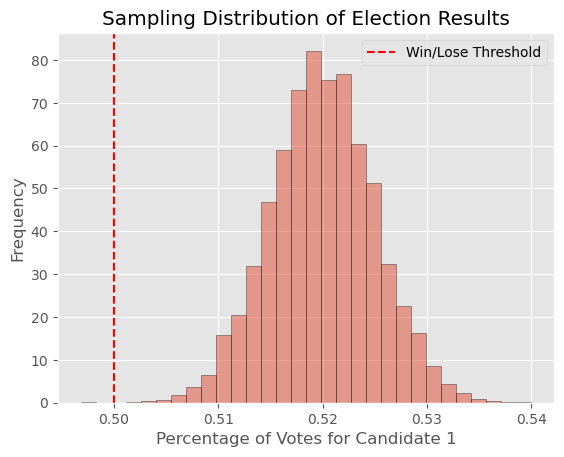

In [15]:
total_voters = 10000 # Number of trials in each experiment
n_experiments = 10000
p_cand_1 = 0.52               # Assuming a fair coin


np.random.seed(42) # for reproducibility
simulated_results = rnd.binomial(n=total_voters, p=p_cand_1, size= n_experiments)/ total_voters

plt.hist(simulated_results, bins = 30, 
        density = True,
        edgecolor = 'black',
        alpha = 0.5)

win_threshold = 0.5
plt.axvline(x=win_threshold, color='r', linestyle='--', label='Win/Lose Threshold')

plt.xlabel('Percentage of Votes for Candidate 1')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Election Results')
plt.legend()



plt.show()

The results of the simulated elections shouldn't surprising, as they simply reflect the probabilities given by the polls. But when simulating elections with multiple polls, or when the election system is weird, things get more interesting. We'll tackle this second case situation next.

---

#### A More Complicated Election

In the U.S., we don't actually vote directly for our president. Anybody might reasonably think that, when a country elects a president, everybody casts their votes for 1 of 2 candidates, and the candidate with the most votes wins. But that's not the way presidential elections work in the U.S. Instead, each *state* is awarded a certain number of votes for president ("electoral college votes"), and whatever candidates wins a state gets *all the votes for that state*, no matter how slim the margin of victory. So it works like this:

* everybody votes for the president *in their home state*
* the votes are counted on a state by state basis
* the winner in each state gets ***all*** the electoral college votes for that state
* the candidate with the most electoral college votes wins the presidency, regardless of the overall vote total.

(There are currently two exceptions, Maine and Nebraska, which allocate their electoral college votes more proportionally to the will of the voters.)


Below, let's simulate elections in a fictional country with 4 states that uses the electoral college system. Let's say that:

* the populations of the states are 11,000, 6,000, 2,000, and 5,000 voters
* each state gets 1 electoral college vote for every 1000 people
* candidate "A" is polling at 51%, 49%, 49%, and 48% in the 4 states

We'll break the code up into chunks and make sure we grok each chunk before we move on.

First, let's set up the information we have:

In [16]:
# Setting up the parameters for the simulation
states_populations = np.array([11000, 6000, 2000, 5000])
electoral_votes_per_person = 1/1000                # 1 electoral vote per 1000 people
states_electoral_votes = states_populations * electoral_votes_per_person
states_polls = np.array([0.51, 0.49, 0.49, 0.48])  # Polls for candidate A in each state
num_simulations = 2000                             # Number of simulations to run

(The number of simulations to run is somewhat arbitrary, but it must be "a lot". 2000 simulations used to be "a lot" but, as computing power has grown so fast, it's now more of a bare minimum.)

Now let's create some vectors to hold the results of each simulation.

In [17]:
# Arrays to store results
electoral_votes_results = np.zeros(num_simulations)
popular_votes_results = np.zeros(num_simulations)

We're ready to simulate! Go through the code carefully to make sure you understand what's happening at each step. Also note the awesome convenience of being able to iterate over multiple variables simultaneously using `zip`!

In [18]:

# Simulation
for i in range(num_simulations):

    # Resetting the vote counts for each simulation
    electoral_votes_A = 0
    popular_votes_A = 0

    # Simulating each state, state by state, accumulating electoral and popular votes as we go
    for electoral_votes, population, poll in zip(states_electoral_votes, states_populations, states_polls):
        votes_A = np.random.binomial(population, poll) # Simulate the popular vote in this state for candidate A
        popular_votes_A += votes_A # Add the popular votes for this state to the total

        # Assigning electoral votes based on majority
        if votes_A > (population/2): # If candidate A wins the popular vote in this state...
            electoral_votes_A += electoral_votes # ...then add the electoral votes for this state to the total

    # Storing the results of the current simulation
    electoral_votes_results[i] = electoral_votes_A # Store the electoral votes for candidate A for this experiment
    popular_votes_results[i] = popular_votes_A # Store the popular votes for candidate A for this experiment


In [29]:
popular_votes_results

array([11785., 11960., 11993., ..., 11920., 12060., 11997.])

On to the fun part – plotting!!! (This code should be self-explanatory to you at this point.)

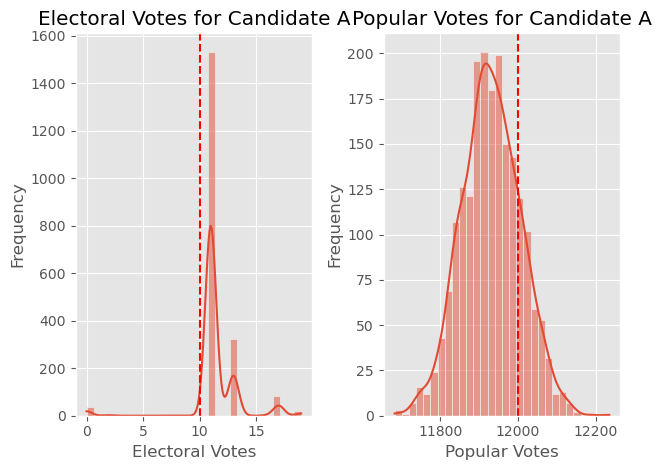

In [49]:

# Plotting the results
# Electoral votes
plt.subplot(1, 2, 1)
sns.histplot(electoral_votes_results, kde=True, bins=30)
plt.title('Electoral Votes for Candidate A')
plt.xlabel('Electoral Votes')
plt.ylabel('Frequency')
plt.axvline(x=10, color='r', linestyle='--')

pop_vote_threshold = 12000
# Popular votes
plt.subplot(1, 2, 2)
sns.histplot(popular_votes_results, kde=True, bins=30)
plt.title('Popular Votes for Candidate A')
plt.xlabel('Popular Votes')
plt.ylabel('Frequency')
plt.axvline(x=12000, color='r', linestyle='--')

plt.tight_layout()
plt.show()

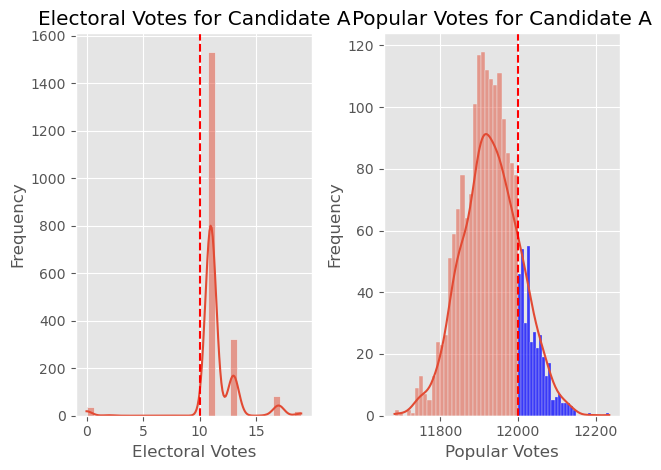

In [50]:

# Plotting the results
# Electoral votes
plt.subplot(1, 2, 1)
sns.histplot(electoral_votes_results, kde=True, bins=30)
plt.title('Electoral Votes for Candidate A')
plt.xlabel('Electoral Votes')
plt.ylabel('Frequency')
plt.axvline(x=10, color='r', linestyle='--')

pop_vote_threshold = 12000
# Popular votes
plt.subplot(1, 2, 2)
sns.histplot(popular_votes_results, kde=True, bins=30, binrange = ( popular_votes_results.min(), pop_vote_threshold))
sns.histplot(popular_votes_results, color = 'b', bins=30, binrange = (pop_vote_threshold, popular_votes_results.max()))
plt.title('Popular Votes for Candidate A')
plt.xlabel('Popular Votes')
plt.ylabel('Frequency')
plt.axvline(x=12000, color='r', linestyle='--')

plt.tight_layout()
plt.show()

Notice something rather striking here; in our fictional country that uses an electoral collage system, candidate A loses the popular vote most of the time, *but wins the election almost every time*! Hmmm...

Importantly, we able to do a simple simulation of real world situation in which the outcome wasn't necessarily intuitive – the distribution of electoral college votes is strange, but we were able to generate it fairly easily using nothing more than letting the situation play out in code!

### Multiple Discrete Outomes

Of course, lots of things in life can more than 2 outcomes. For example, there might be 3 candidates running for mayor. Or we might be interested in the total number of special needs students across school districts, where each of several classes in each district have between 2 and 12 students.

Just as we initially used a simple coin to illustrate situations in which each trial had exactly 2 outcomes, we can use dice to illustrate situations in which each trial can have multiple discrete outcomes. This framework essential covers all situations in which we are *counting* things, like number of students, number of patients responding to a treatment, etc.

#### Rolling Dice

Let's simulate rolling a (typical six-sided) die 100 times. Assuming the die is fair, how often would you expect each number to come up?


In [20]:
# Simulate rolling a fair six-sided die 100 times
dice_rolls = rnd.choice(np.arange(1, 7), size=100)

Now let's plot the results in a bar chart showing the frequency of each outcome (1 through 6).


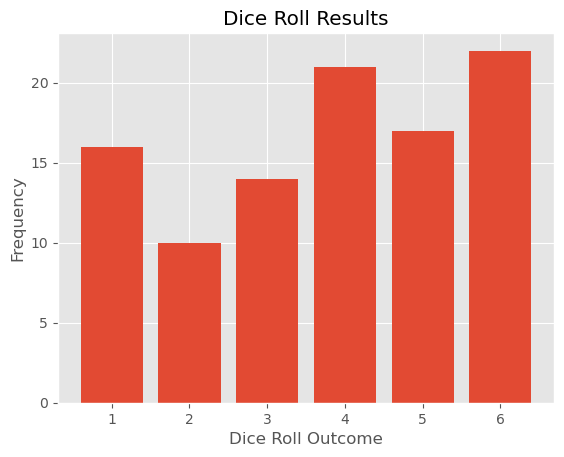

In [21]:
# Plot the results in a bar chart
plt.hist(dice_rolls, bins=np.arange(0.5, 7.5, 1), rwidth=0.8)
plt.xlabel('Dice Roll Outcome')
plt.ylabel('Frequency')
plt.title('Dice Roll Results')
plt.xticks(np.arange(1, 7))
plt.show()

The sampling distribution of this situation is the generalization of the binomial distribution to more than two outcomes and is called the *multinomial* distribution. The multinomial distribution for a 6 sided die is really hard to picture, as it would be a 5 dimensional plot!

Instead, before we get back to rolling dice, let's look at the multinomial distribution for a situation that has only 3 possible outcomes: "A", "B", or "C". This could be, for example, which one of 3 possible toys a kid gets in their happy meal.

Note that this code is virtually identical to the code we used above to get the sampling distribution of the number of heads in a coin flip. In that case, we had 2 mutually exclusive outcomes, so we ended up with a 1-dimensional histogram. Now we have 3 mutually-exclusive outcomes, so we end up with a 2-dimensional histogram.

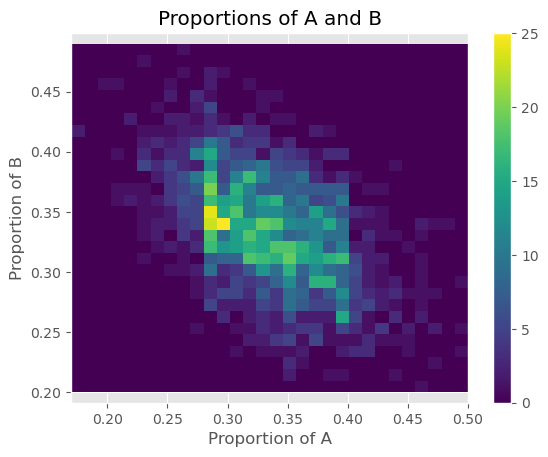

In [22]:
# Set up the parameters for the simulation
n_experiments = 2000
n_trials = 100

# Initialize the counts
A_counts = np.zeros(n_experiments)
B_counts = np.zeros(n_experiments)

# Run the simulation
for i in range(n_experiments):
    # Randomly select from A, B, or C 100 times
    selections = np.random.choice(['A', 'B', 'C'], size=n_trials)
    # Count the number of times each A or B was selected
    A_counts[i] = np.sum(selections == 'A')
    B_counts[i] = np.sum(selections == 'B')

# Calculate the proportions
p_A = A_counts / n_trials
p_B = B_counts / n_trials

# plot a 2D histogram of p_A and p_B
plt.hist2d(p_A, p_B, bins=30)
plt.xlabel('Proportion of A')
plt.ylabel('Proportion of B')
plt.title('Proportions of A and B')
plt.colorbar()
plt.axis('equal')
plt.show()

So we end up with a 2D histogram; the multinomial distribution for the situation in which there are 3 choices on each trial and 100 trial are done.

Okay, back to dice!

#### Multiple discreet outcomes: Dice Rolls



Let's start by looking at the common situation of rolling 2 dice and adding the numbers to get the outcome, such as is done in the casino game Craps, as well as countless board games such as Monopoly.

Take a second to think about what the distribution of the sum of 2 dice might look like – how often would "snake eyes" come up relative to "lucky 7"?

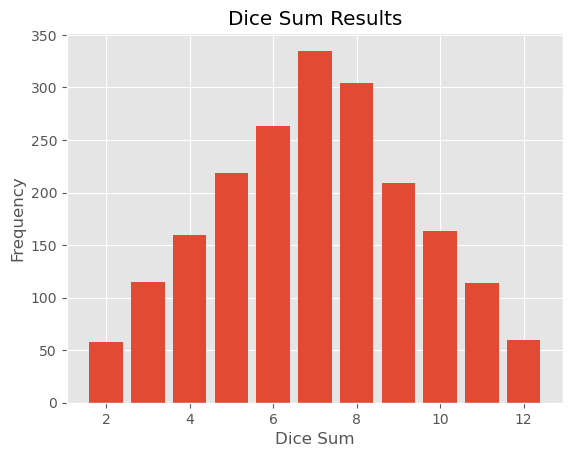

In [23]:
n_dice = 2
n_trials = 2000
dice_sums = np.zeros(n_dice*6 + 1) # Initialize the histogram

# Simulate rolling the dice
for i in range(n_trials) :
    dice_rolls = np.random.randint(1, 7, size=n_dice)
    # Sum the rolls
    dice_sum = np.sum(dice_rolls)
    # Increment the count in the histogram
    dice_sums[dice_sum] += 1

# Plot the results
plt.bar(np.arange(2, 13), dice_sums[2:])
plt.xlabel('Dice Sum')
plt.ylabel('Frequency')
plt.title('Dice Sum Results')
plt.show()


So perhaps "lucky 7" isn't really lucky, it's just more probable. For 2 dice, many combinations sum to lucky 7, but only 1 sums to snake eyes.

An import point to note is that the outcome of rolling 1 die as we did earlier on resulted in a flat or **uniform** distribution, whereas if we roll just 2 dice and sum the outcomes, we get something that looks more bell shaped.

Now, let's try the exact same thing except we'll add up the rolls of 10 dice instead of 2. 

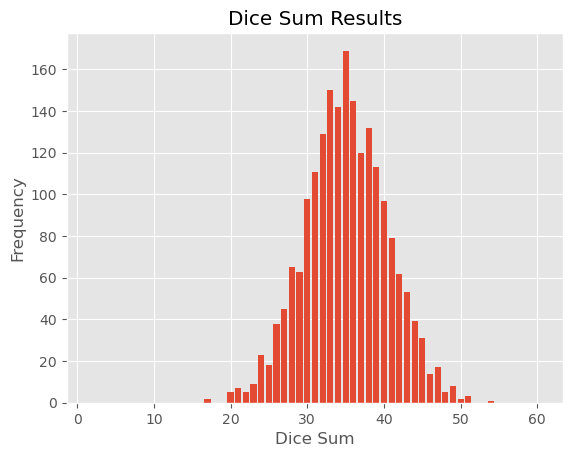

In [24]:
n_dice = 10
n_trials = 2000
dice_sums = np.zeros(n_dice*6 + 1) # Initialize the histogram

# Simulate rolling the dice
for i in range(n_trials) :
    dice_rolls = np.random.randint(1, 7, size=n_dice)
    # Sum the rolls
    dice_sum = np.sum(dice_rolls)
    # Increment the count in the histogram
    dice_sums[dice_sum] += 1

# Plot the results
plt.bar(np.arange(2, 61), dice_sums[2:])
plt.xlabel('Dice Sum')
plt.ylabel('Frequency')
plt.title('Dice Sum Results')
plt.show()


Notice that the distribution became more Gaussian in shape – it grew tails! This is the Central Limit Theorem in action: If you sum a number of random variables, the distribution of the sum will approach the Gaussian distribution as the number of addends increases, *regardless of the distribution of the addends*.

In this case, our addends were drawn from a *uniform* distribution of the integers 1 to 6, yet the distribution of the sum of just 10 such numbers is remarkably Gaussian.

### Summary:

Discrete random variables are things that can have limited set of values. This occurs when we count things, like how many trees in a forest are coniferous vs deciduous, etc.

Many real world situations can boiled down to operations on discrete random variables, such as 2-layered elections (like the way presidents are elected in the U.S.).

When some final value is the sum of many random variables, even if they are discrete, the distribution of final values approaches a Gaussian distribution, which is the core of Central Limit Theorem.



